In [318]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from skopt.plots import plot_convergence
from skopt import forest_minimize
import Model_Evaluation as me

In [319]:
data = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/src_books/Data_Prep/exog_daily_values.csv')
data.drop(['Unnamed: 0', 'Date', 'Ratio'], axis=1, inplace=True)
data

,Sum of Sales,Year_Month,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,14056.71,2008-01,2866.691952,4.391770,196.007117,343.990581,149.909632,4.821406,4.961832,5.690660,...,48.197997,-148.274746,57504.040160,0.166231,27705.690812,2336.234997,51517.719136,21315.117421,4492.639736,3493.235620
1,5997.04,2008-01,1223.022052,1.873669,83.622876,146.757333,63.956221,2.056965,2.116876,2.427817,...,20.562800,-63.258727,24533.054249,0.070919,11820.129748,996.712227,21979.099118,9093.707687,1916.703140,1490.325527
2,10040.78,2008-01,2047.692754,3.137064,140.008888,245.714235,107.081218,3.443955,3.544262,4.064868,...,34.428076,-105.913411,41075.430620,0.118739,19790.316951,1668.784632,36799.370830,15225.497623,3209.115590,2495.236108
3,10788.22,2008-01,2200.123887,3.370588,150.431210,264.005309,115.052390,3.700324,3.808099,4.367458,...,36.990917,-113.797651,44133.103417,0.127578,21263.516693,1793.009681,39538.731889,16358.890243,3448.003541,2680.982561
4,15470.33,2008-01,3154.982247,4.833431,215.718669,378.584164,164.985368,5.306273,5.460821,6.262944,...,53.045052,-163.186069,63286.962426,0.182948,30491.927324,2571.179626,56698.624065,23458.682757,4944.444275,3844.534589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,26370.91,2020-11,3885.710811,5.862320,273.878131,401.182442,159.144994,8.523051,6.611171,7.328880,...,98.376272,-990.620179,96218.998973,0.498394,34061.416998,3542.344601,69784.219785,22484.975177,8026.621414,6317.094110
3314,18172.04,2020-11,2677.620616,4.039690,188.727820,276.452476,109.665886,5.873185,4.555719,5.050289,...,67.790514,-682.630578,66303.950000,0.343440,23471.523438,2441.008967,48087.898116,15494.265018,5531.097918,4353.072642
3315,54503.33,2020-11,8030.977263,12.116228,566.050628,829.162854,328.920471,17.615420,13.663952,15.147311,...,203.323830,-2047.411278,198865.183389,1.030079,70398.050387,7321.308850,144229.848714,46471.889749,16589.400811,13056.154108
3316,59634.30,2020-11,8787.017369,13.256856,619.338909,907.220648,359.885204,19.273744,14.950283,16.573286,...,222.464834,-2240.155571,217586.448493,1.127052,77025.357096,8010.540426,157807.716835,50846.776057,18151.135073,14285.266808


In [320]:
data = data[data['Sum of Sales'] != 0]
data.reset_index(inplace=True, drop=True)

In [321]:
data

,Sum of Sales,Year_Month,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,14056.71,2008-01,2866.691952,4.391770,196.007117,343.990581,149.909632,4.821406,4.961832,5.690660,...,48.197997,-148.274746,57504.040160,0.166231,27705.690812,2336.234997,51517.719136,21315.117421,4492.639736,3493.235620
1,5997.04,2008-01,1223.022052,1.873669,83.622876,146.757333,63.956221,2.056965,2.116876,2.427817,...,20.562800,-63.258727,24533.054249,0.070919,11820.129748,996.712227,21979.099118,9093.707687,1916.703140,1490.325527
2,10040.78,2008-01,2047.692754,3.137064,140.008888,245.714235,107.081218,3.443955,3.544262,4.064868,...,34.428076,-105.913411,41075.430620,0.118739,19790.316951,1668.784632,36799.370830,15225.497623,3209.115590,2495.236108
3,10788.22,2008-01,2200.123887,3.370588,150.431210,264.005309,115.052390,3.700324,3.808099,4.367458,...,36.990917,-113.797651,44133.103417,0.127578,21263.516693,1793.009681,39538.731889,16358.890243,3448.003541,2680.982561
4,15470.33,2008-01,3154.982247,4.833431,215.718669,378.584164,164.985368,5.306273,5.460821,6.262944,...,53.045052,-163.186069,63286.962426,0.182948,30491.927324,2571.179626,56698.624065,23458.682757,4944.444275,3844.534589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,26370.91,2020-11,3885.710811,5.862320,273.878131,401.182442,159.144994,8.523051,6.611171,7.328880,...,98.376272,-990.620179,96218.998973,0.498394,34061.416998,3542.344601,69784.219785,22484.975177,8026.621414,6317.094110
3309,18172.04,2020-11,2677.620616,4.039690,188.727820,276.452476,109.665886,5.873185,4.555719,5.050289,...,67.790514,-682.630578,66303.950000,0.343440,23471.523438,2441.008967,48087.898116,15494.265018,5531.097918,4353.072642
3310,54503.33,2020-11,8030.977263,12.116228,566.050628,829.162854,328.920471,17.615420,13.663952,15.147311,...,203.323830,-2047.411278,198865.183389,1.030079,70398.050387,7321.308850,144229.848714,46471.889749,16589.400811,13056.154108
3311,59634.30,2020-11,8787.017369,13.256856,619.338909,907.220648,359.885204,19.273744,14.950283,16.573286,...,222.464834,-2240.155571,217586.448493,1.127052,77025.357096,8010.540426,157807.716835,50846.776057,18151.135073,14285.266808


In [322]:
data['month'] = data['Year_Month'].str.split('-', expand=True)[1]
year_month = data['Year_Month']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [323]:
data.drop(['Year_Month'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [324]:
data

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x",month
0,14056.71,2866.691952,4.391770,196.007117,343.990581,149.909632,4.821406,4.961832,5.690660,4.973790,...,-148.274746,57504.040160,0.166231,27705.690812,2336.234997,51517.719136,21315.117421,4492.639736,3493.235620,01
1,5997.04,1223.022052,1.873669,83.622876,146.757333,63.956221,2.056965,2.116876,2.427817,2.121977,...,-63.258727,24533.054249,0.070919,11820.129748,996.712227,21979.099118,9093.707687,1916.703140,1490.325527,01
2,10040.78,2047.692754,3.137064,140.008888,245.714235,107.081218,3.443955,3.544262,4.064868,3.552803,...,-105.913411,41075.430620,0.118739,19790.316951,1668.784632,36799.370830,15225.497623,3209.115590,2495.236108,01
3,10788.22,2200.123887,3.370588,150.431210,264.005309,115.052390,3.700324,3.808099,4.367458,3.817276,...,-113.797651,44133.103417,0.127578,21263.516693,1793.009681,39538.731889,16358.890243,3448.003541,2680.982561,01
4,15470.33,3154.982247,4.833431,215.718669,378.584164,164.985368,5.306273,5.460821,6.262944,5.473981,...,-163.186069,63286.962426,0.182948,30491.927324,2571.179626,56698.624065,23458.682757,4944.444275,3844.534589,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,26370.91,3885.710811,5.862320,273.878131,401.182442,159.144994,8.523051,6.611171,7.328880,7.133669,...,-990.620179,96218.998973,0.498394,34061.416998,3542.344601,69784.219785,22484.975177,8026.621414,6317.094110,11
3309,18172.04,2677.620616,4.039690,188.727820,276.452476,109.665886,5.873185,4.555719,5.050289,4.915770,...,-682.630578,66303.950000,0.343440,23471.523438,2441.008967,48087.898116,15494.265018,5531.097918,4353.072642,11
3310,54503.33,8030.977263,12.116228,566.050628,829.162854,328.920471,17.615420,13.663952,15.147311,14.743850,...,-2047.411278,198865.183389,1.030079,70398.050387,7321.308850,144229.848714,46471.889749,16589.400811,13056.154108,11
3311,59634.30,8787.017369,13.256856,619.338909,907.220648,359.885204,19.273744,14.950283,16.573286,16.131843,...,-2240.155571,217586.448493,1.127052,77025.357096,8010.540426,157807.716835,50846.776057,18151.135073,14285.266808,11


In [325]:
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data['month'].values.reshape(-1,1)).toarray()
dfone_hot = pd.DataFrame(ohe, columns=['month_'+str(ohc.categories_[0][j]) 
                                           for j in range(len(ohc.categories_[0]))])
data = data.join(dfone_hot)

In [326]:
data

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,14056.71,2866.691952,4.391770,196.007117,343.990581,149.909632,4.821406,4.961832,5.690660,4.973790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5997.04,1223.022052,1.873669,83.622876,146.757333,63.956221,2.056965,2.116876,2.427817,2.121977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10040.78,2047.692754,3.137064,140.008888,245.714235,107.081218,3.443955,3.544262,4.064868,3.552803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10788.22,2200.123887,3.370588,150.431210,264.005309,115.052390,3.700324,3.808099,4.367458,3.817276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15470.33,3154.982247,4.833431,215.718669,378.584164,164.985368,5.306273,5.460821,6.262944,5.473981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,26370.91,3885.710811,5.862320,273.878131,401.182442,159.144994,8.523051,6.611171,7.328880,7.133669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3309,18172.04,2677.620616,4.039690,188.727820,276.452476,109.665886,5.873185,4.555719,5.050289,4.915770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3310,54503.33,8030.977263,12.116228,566.050628,829.162854,328.920471,17.615420,13.663952,15.147311,14.743850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3311,59634.30,8787.017369,13.256856,619.338909,907.220648,359.885204,19.273744,14.950283,16.573286,16.131843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [327]:
target = data['Sum of Sales']/100000
features = data.drop(['Sum of Sales'], axis=1)

In [328]:
# Standardizing the features based on unit variance
features = StandardScaler().fit_transform(features)

# split train test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.11, shuffle=False, random_state=60616)

In [329]:
X_train.shape

(2948, 91)

In [330]:
X_test.shape

(365, 91)

In [331]:
def objective(params):
    # unpacking the parameters
    learning_rate, gamma, max_depth, min_child_weight, reg_lambda, reg_alpha = params
    
    model_iii = XGBRegressor(learning_rate=learning_rate, gamma=gamma, max_depth=max_depth, min_child_weight=min_child_weight, reg_lambda=reg_lambda, reg_alpha=reg_alpha)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Handle some numerical issue going on
    if np.abs(mse + 1) < 0.01 or mse < -1.0:
        return 0.0
    else:
        return mse

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0001
Function value obtained: 0.1330
Current minimum: 0.1330
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6012
Function value obtained: 0.1330
Current minimum: 0.1330
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.9577
Function value obtained: 0.0234
Current minimum: 0.0234
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.8964
Function value obtained: 0.1524
Current minimum: 0.0234
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 2.2180
Function value obtained: 0.0215
Current minimum: 0.0215
Iteration No: 6 started. Evaluating

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.6790
Function value obtained: 0.0205
Current minimum: 0.0189
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.5930
Function value obtained: 0.0213
Current minimum: 0.0189
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 2.4547
Function value obtained: 0.0199
Current minimum: 0.0189
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 2.0362
Function value obtained: 0.0207
Current minimum: 0.0189
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 2.4170
Function value obtained: 0.0217
Current minimum: 0.0189
Iteration No: 27 started. Sea

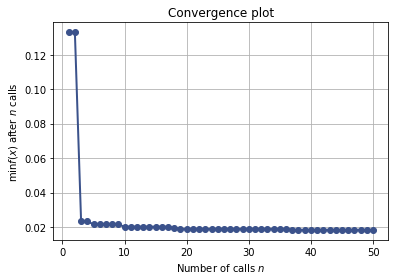

In [332]:
# Bayesian Optimization
num_thread = 20
params = ['learning_rate', 'gamma', 'max_depth', 'min_child_weight', 'reg_lambda', 'reg_alpha']

space = [(0.0001, 0.0009, 0.001, 0.009, 0.01, 0.09, 0.1, 0.9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (2, 4, 6, 8, 10),
         (1,3,5,7,9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Minimum MSE found: {:6.5f}'.format(res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))

plot_convergence(res_fm);

In [333]:
reg = XGBRegressor(learning_rate=0.1, gamma=0.25, max_depth=2, min_child_weight=9,
                    reg_lambda=1.5, reg_alpha=2, random_state=60616)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [334]:
# For Training data
me.evaluate_model(y_pred_train,y_train)

			Model Performance

Mean Absolute Percentage Error: 0.9462445114492527

Mean Absolute Error: 0.03614660478106301

BIAS: -0.0006875092284300887

Mean Squared Error: 0.0013934280326924281

Root Mean Squared Error: 0.03732864895348381


In [335]:
# For testing data
me.evaluate_model(y_pred_test,y_test)

			Model Performance

Mean Absolute Percentage Error: 1.2736272218336468

Mean Absolute Error: 0.08236590034774048

BIAS: 0.00942565895191454

Mean Squared Error: 0.03242771203739945

Root Mean Squared Error: 0.1800769614287165


### Training Plot

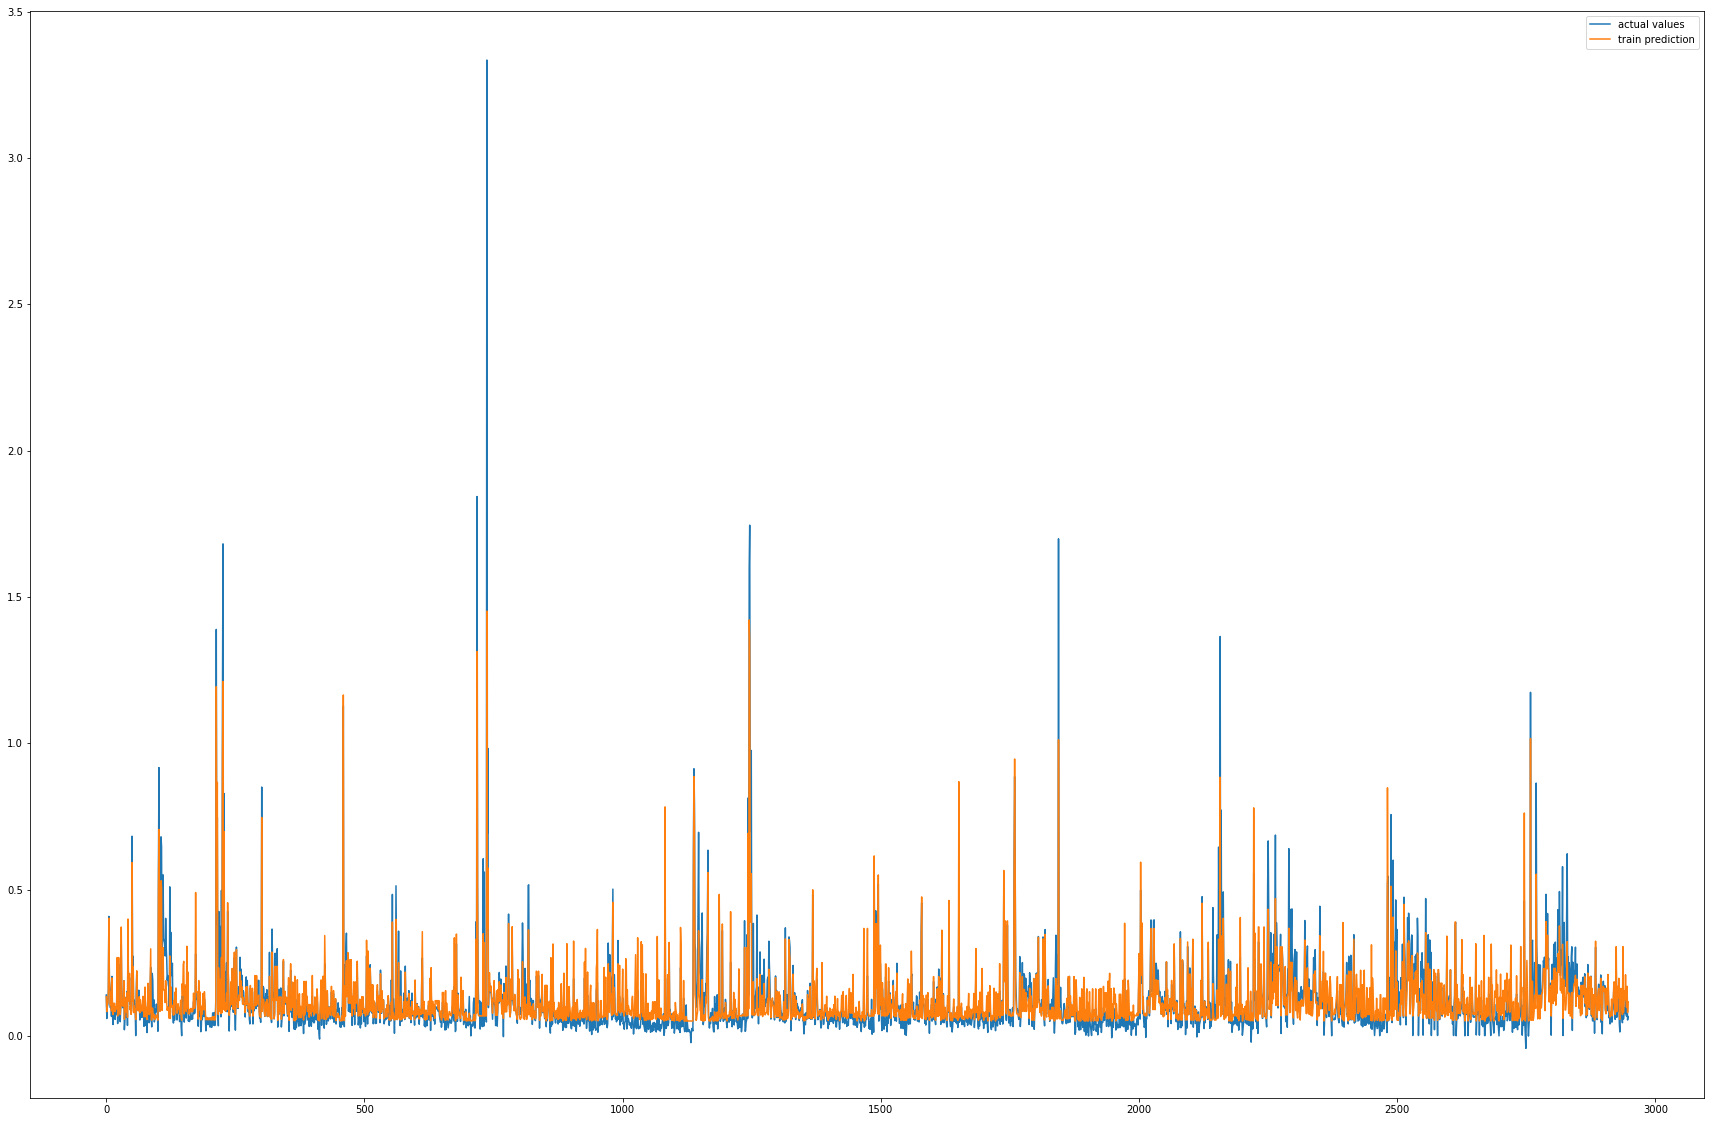

In [336]:
import matplotlib.pyplot as plt
plt.figure(figsize=((30,20)))
plt.plot(target[0:2948], label="actual values")
plt.plot(y_pred_train, label='train prediction')
plt.legend()
plt.show()

In [337]:
actual = np.array(y_test)
actual

array([-5.8183000e-03,  2.7082800e-02,  3.2070100e-02,  1.1394910e-01,
        8.3269700e-02,  8.9281000e-02,  4.1750500e-02,  4.3866900e-02,
        7.9720800e-02,  3.1319700e-02,  1.9440000e-02,  2.7919950e-01,
        5.6455700e-02,  8.5009200e-02,  3.9369400e-02,  8.8498800e-02,
        6.9259500e-02,  5.4466700e-02,  6.7020400e-02,  2.6594600e-01,
        2.3283620e-01,  3.7604200e-02,  5.6395900e-02,  6.5532200e-02,
        4.3584600e-02,  7.6272000e-02,  6.0551900e-02,  1.0424850e-01,
        7.8003800e-02,  1.7064100e-02,  6.5565800e-02,  3.4429700e-02,
        5.2799100e-02,  3.5691500e-02,  6.3811800e-02,  7.6569700e-02,
        1.8879500e-02,  6.8534400e-02,  9.3955500e-02,  1.1163820e-01,
        4.1626500e-02,  1.6735400e-02,  4.4272000e-02,  2.7427900e-02,
        7.1214500e-02,  2.2577500e-02,  6.0441800e-02,  3.4469400e-02,
        5.0465600e-02,  3.0210500e-02,  5.3635300e-02,  5.8660600e-02,
        1.7350600e-02,  4.6437800e-02,  4.8563000e-02,  2.5689900e-02,
      

In [338]:
lists = [actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Actual', 1: 'Predicted'})
df

,Actual,Predicted
0,-581.83,5161.091685
1,2708.28,5967.417359
2,3207.01,6514.680386
3,11394.91,17018.413544
4,8326.97,13772.970438
...,...,...
360,26370.91,23510.628939
361,18172.04,18705.660105
362,54503.33,65561.461449
363,59634.30,81202.876568


### Testing Plot (1 year)

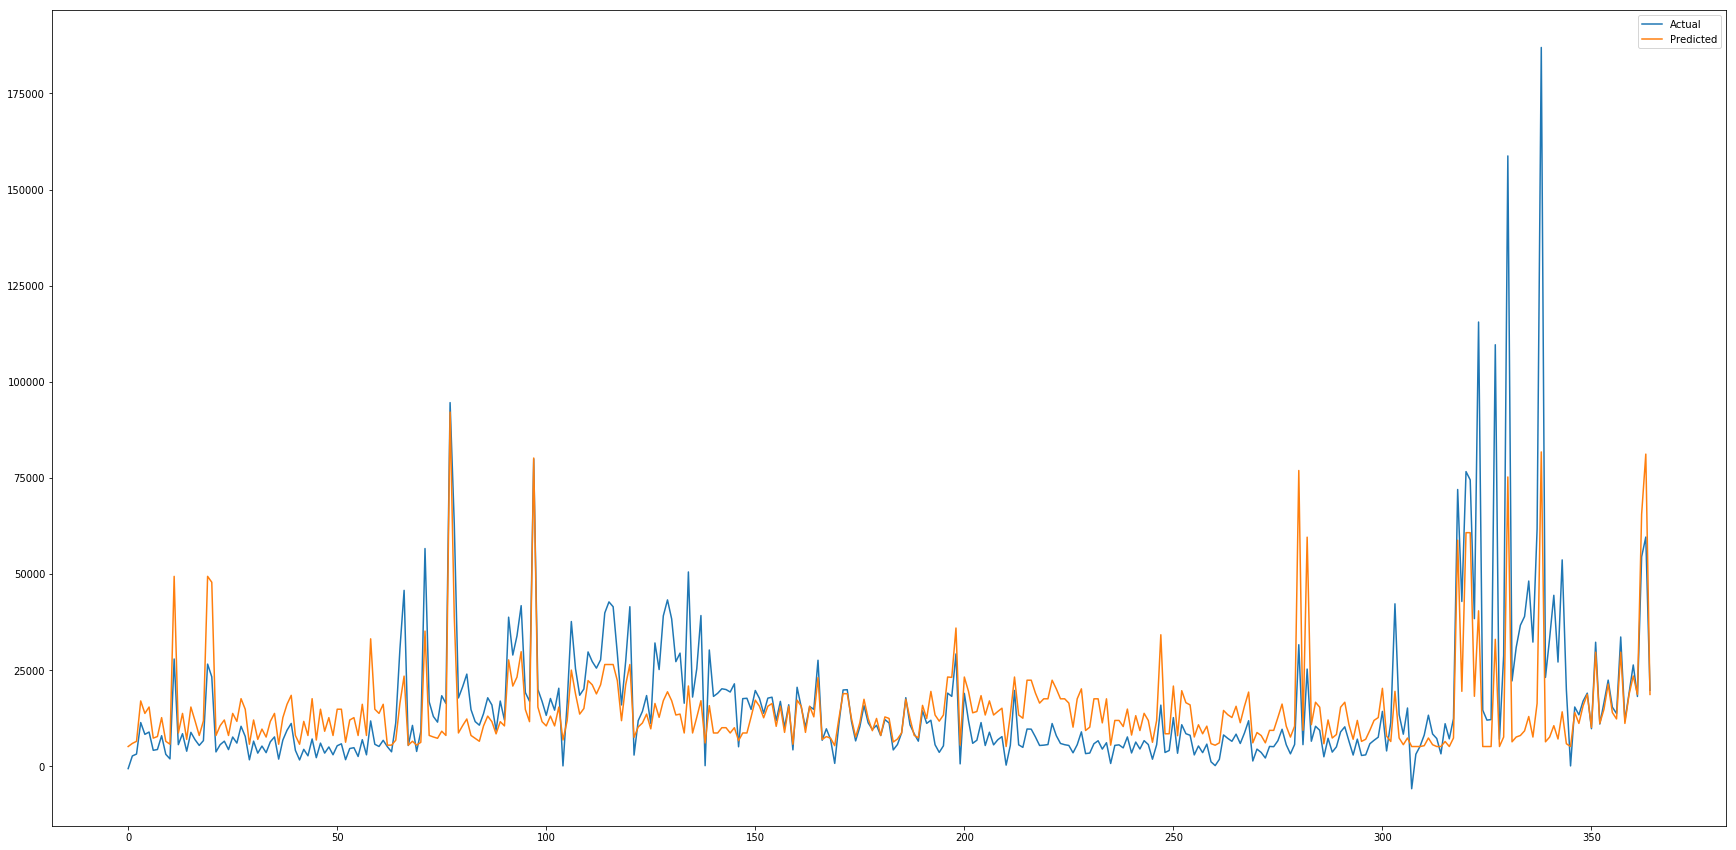

In [339]:
plt.figure(figsize=((30,15)))
plt.plot(df.Actual, label='Actual')
plt.plot(df.Predicted, label='Predicted')
plt.legend()
plt.show()

### Last twelve days Observations

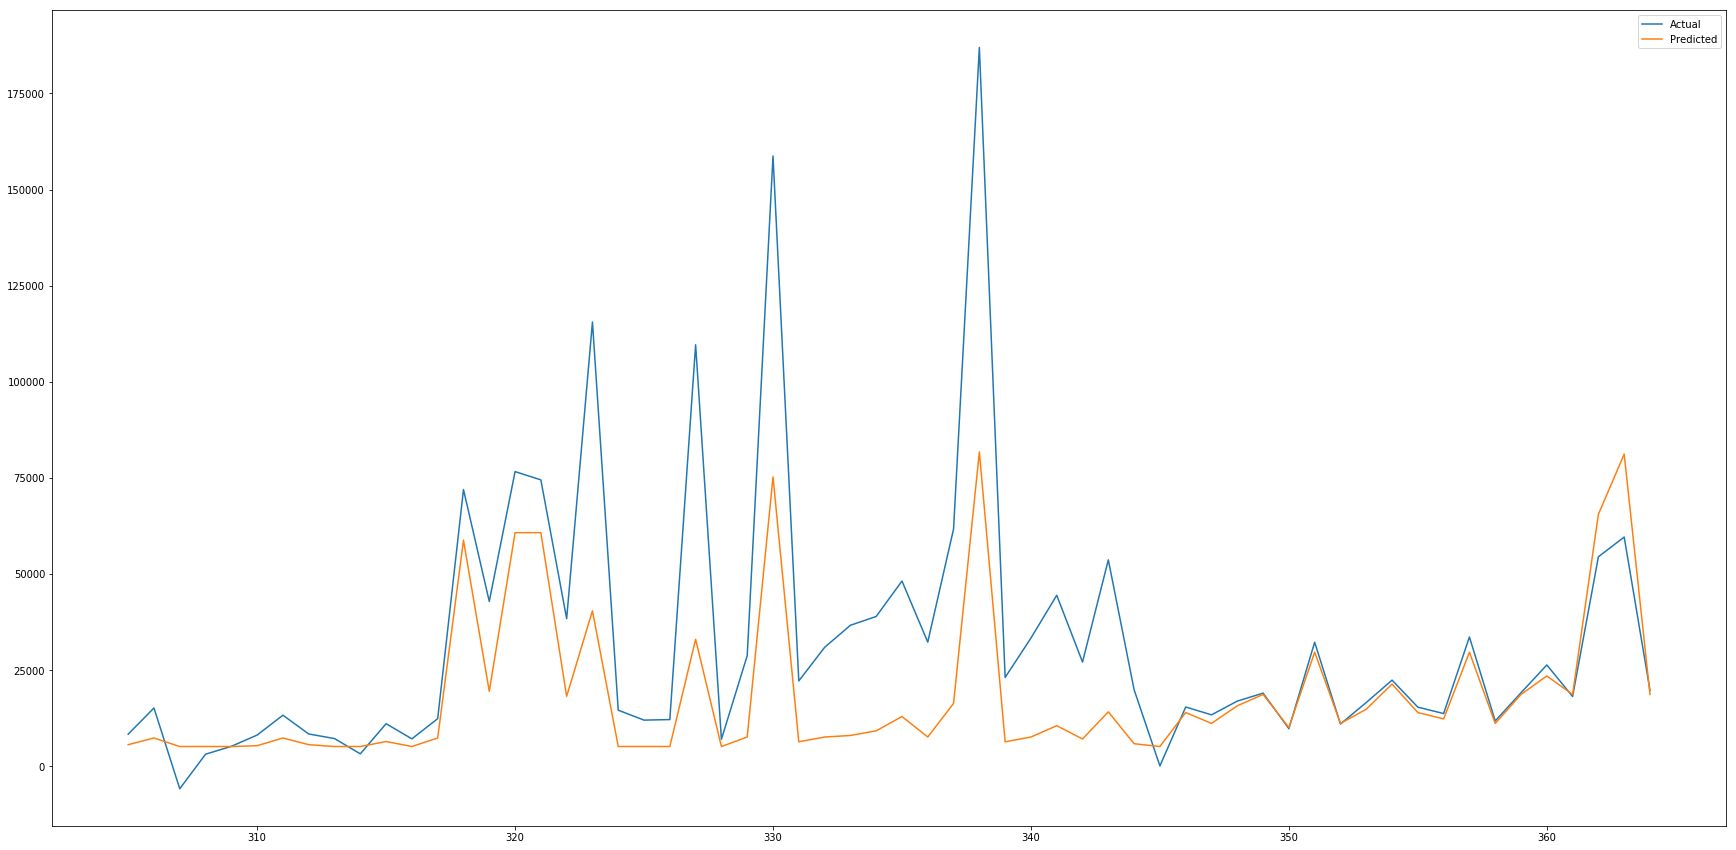

In [340]:
plt.figure(figsize=((30,15)))
plt.plot(df.Actual[-60:], label='Actual')
plt.plot(df.Predicted[-60:], label='Predicted')
plt.legend()
plt.show()

In [341]:
df

,Actual,Predicted
0,-581.83,5161.091685
1,2708.28,5967.417359
2,3207.01,6514.680386
3,11394.91,17018.413544
4,8326.97,13772.970438
...,...,...
360,26370.91,23510.628939
361,18172.04,18705.660105
362,54503.33,65561.461449
363,59634.30,81202.876568


In [352]:
lists = [np.array(year_month[2948:]), actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Year_Month', 1: 'Actual', 2: 'Predicted'})
df

,Year_Month,Actual,Predicted
0,2019-07,-581.83,5161.091685
1,2019-07,2708.28,5967.417359
2,2019-07,3207.01,6514.680386
3,2019-07,11394.91,17018.413544
4,2019-07,8326.97,13772.970438
...,...,...,...
360,2020-11,26370.91,23510.628939
361,2020-11,18172.04,18705.660105
362,2020-11,54503.33,65561.461449
363,2020-11,59634.30,81202.876568


In [358]:
data_Qwe = df.groupby('Year_Month').sum()

In [355]:
me.evaluate_model(df['Predicted']/100000, df['Actual']/100000)

			Model Performance

Mean Absolute Percentage Error: 1.2736272218336468

Mean Absolute Error: 0.08236590034774048

BIAS: 0.00942565895191454

Mean Squared Error: 0.03242771203739945

Root Mean Squared Error: 0.1800769614287165


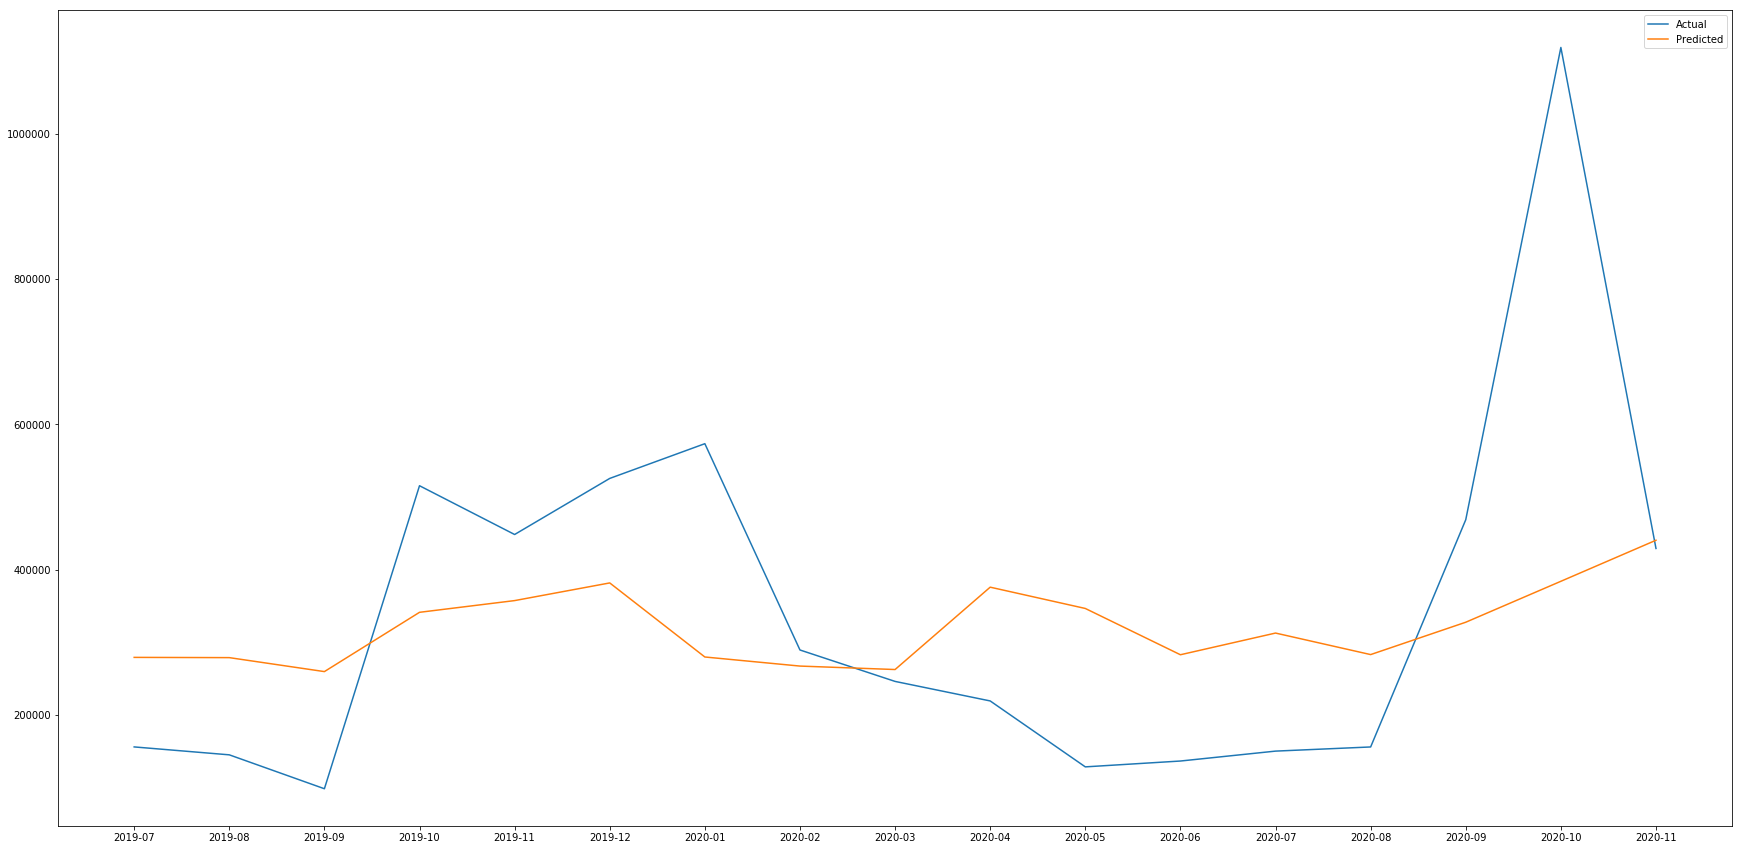

In [359]:
plt.figure(figsize=(30,15))
plt.plot(data_Qwe['Actual'], label='Actual')
plt.plot(data_Qwe['Predicted'], label='Predicted')
plt.legend()
plt.show()